In [1]:
#Importing necessary libraries

from pandas import read_csv
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


Dimensions of the dataset

(13940, 3)

First 5 rows of the dataset

   id1  id2 activity
0  d02  d01    great
1  d03  d01    great
2  d04  d01    great
3  d05  d01    great
4  d06  d01    great

Last 5 rows of the dataset

       id1  id2 activity
13935  d45  d51     less
13936  d48  d51     less
13937  d45  d52     less
13938  d48  d52     less
13939  d45  d53     less

Statistical Summary

          id1    id2 activity
count   13940  13940    13940
unique     55     55        2
top       d02    d02     less
freq      270    270     6970

Pyrimidines

activity
great    6970
less     6970
dtype: int64


<AxesSubplot:xlabel='activity', ylabel='count'>

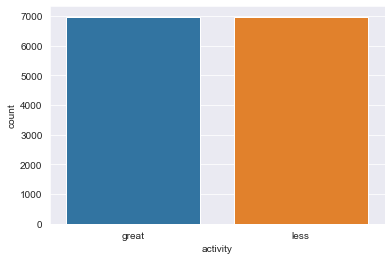

In [2]:
Pyrimidines = pd.read_csv('Pyrimidines_Num.csv') # read the dataset
print("\nDimensions of the dataset\n")
print(Pyrimidines.shape)
# First 5 Data
print("\nFirst 5 rows of the dataset\n")
print(Pyrimidines.head(5))
# Last 5 Data
print("\nLast 5 rows of the dataset\n")
print(Pyrimidines.tail(5))
print("\nStatistical Summary\n")
print(Pyrimidines.describe())
# Mushroom Classification
print("\nPyrimidines\n")
print(Pyrimidines.groupby('activity').size())
sns.set_style("darkgrid")
sns.countplot(x='activity',data=Pyrimidines)

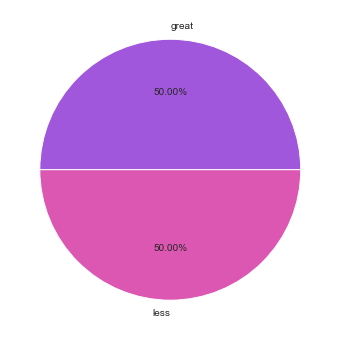

In [3]:
#Plotting the count of class
plt.figure(figsize=(6, 6))
Pyri_activity_vals = ['great','less']
count = [len(Pyrimidines[Pyrimidines['activity'] == 'great']),len(Pyrimidines[Pyrimidines['activity'] == 'less'])]
colors = sns.color_palette("hls", 8)[6:8]
plt.pie(count, labels = Pyri_activity_vals,colors=colors,autopct='%1.2f%%')
plt.show()

<h3> <font color="blue"> Analysing Data </font> </h3>

In [4]:
for i in Pyrimidines.columns:
    print(i, Pyrimidines[i].unique())

id1 ['d02' 'd03' 'd04' 'd05' 'd06' 'd07' 'd09' 'd10' 'd12' 'd13' 'd14' 'd15'
 'd16' 'd17' 'd18' 'd19' 'd21' 'd22' 'd25' 'd26' 'd27' 'd28' 'd29' 'd32'
 'd33' 'd35' 'd36' 'd38' 'd40' 'd41' 'd43' 'd44' 'd45' 'd46' 'd47' 'd48'
 'd49' 'd50' 'd51' 'd52' 'd53' 'd54' 'd55' 'd01' 'd08' 'd11' 'd20' 'd23'
 'd24' 'd30' 'd31' 'd34' 'd37' 'd39' 'd42']
id2 ['d01' 'd02' 'd03' 'd04' 'd05' 'd06' 'd07' 'd09' 'd10' 'd12' 'd13' 'd14'
 'd15' 'd16' 'd17' 'd18' 'd19' 'd21' 'd22' 'd25' 'd26' 'd27' 'd28' 'd29'
 'd32' 'd33' 'd35' 'd36' 'd38' 'd40' 'd41' 'd43' 'd45' 'd46' 'd49' 'd53'
 'd54' 'd55' 'd48' 'd50' 'd44' 'd47' 'd51' 'd52' 'd08' 'd11' 'd20' 'd23'
 'd24' 'd30' 'd31' 'd34' 'd37' 'd39' 'd42']
activity ['great' 'less']


In [5]:
# Label Encoding
le = LabelEncoder()
for i in Pyrimidines.columns:
    Pyrimidines[i] = le.fit_transform(Pyrimidines[i])
Pyrimidines

,id1,id2,activity
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
...,...,...,...
13935,44,50,1
13936,47,50,1
13937,44,51,1
13938,47,51,1


In [6]:
zero_cols = [ col for col, is_zero in ((Pyrimidines == 0).sum() == Pyrimidines.shape[0]).items() if is_zero ]
print (zero_cols)

[]


In [7]:
NUM_POINTS = 2
feature_names= list(Pyrimidines.columns[0:NUM_POINTS])
feature_names

['id1', 'id2']

<h3> <font color="blue"> Extracting attributes & labels </font> </h3>

In [8]:
# Extracting data attributes
X = Pyrimidines[feature_names]

# Extracting target/ class labels
y = Pyrimidines.values[:,-1] # 1 - less, 0 - great

## Data Visualization

<h3> <font color="blue"> 1. Univariate plots </font> </h3>

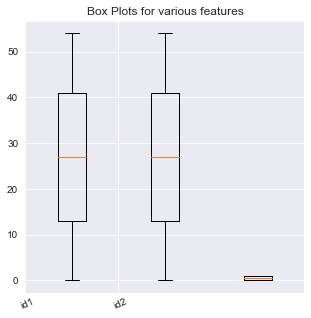

In [9]:
NUM_POINTS = 2
features= list(Pyrimidines.columns[0:NUM_POINTS])

fig, ax = plt.subplots(figsize=(5,5))
ax.boxplot(Pyrimidines)

# Set number of ticks for x-axis
ax.set_xticks([float(n)+0.5 for n in range(NUM_POINTS)])
# Set ticks labels for x-axis
ax.set_xticklabels(features, rotation=25, rotation_mode="anchor",fontsize=10)

plt.title("Box Plots for various features")
plt.show()
plt.close()

<AxesSubplot:xlabel='id2', ylabel='count'>

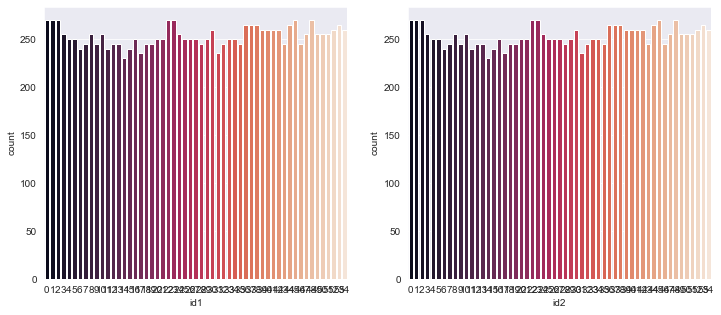

In [10]:
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,4,1)
sns.countplot(data=Pyrimidines,x='id1', palette='rocket')
ax = fig.add_subplot(1,4,2)
sns.countplot(data=Pyrimidines,x='id2', palette='rocket')

<h3> <font color="blue"> 2. Multivariate plots </font> </h3>

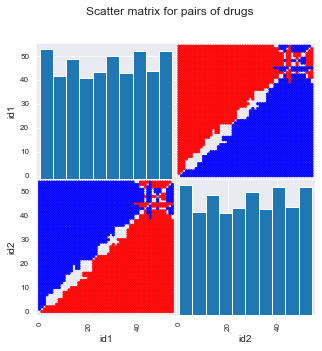

In [11]:
#Color Labels - 0 is Edible and 1 is Poisonous
color_dic = {0:'red', 1:'blue'} 
target_list = list(Pyrimidines['activity'])
colors = list(map(lambda x: color_dic.get(x), target_list))
#Plotting the scatter matrix
sm = pd.plotting.scatter_matrix(Pyrimidines[feature_names], c= colors, alpha=0.4, figsize=((5,5)))
plt.suptitle("Scatter matrix for pairs of drugs ")
plt.show()

<h3> <font color="blue"> 3. Heatmap </font> </h3>

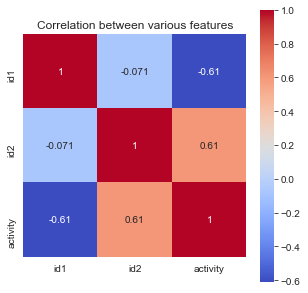

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(Pyrimidines.iloc[:,:3].corr(), annot=True, square=True, cmap='coolwarm')
# Set number of ticks for x-axis
ax.set_xticks([float(n)+0.5 for n in range(NUM_POINTS)])
# Set ticks labels for x-axis
ax.set_xticklabels(feature_names, rotation=25, rotation_mode="anchor",fontsize=10)
# Set number of ticks for y-axis
ax.set_yticks([float(n)+0.5 for n in range(NUM_POINTS)])
# Set ticks labels for y-axis
ax.set_yticklabels(features, rotation='horizontal', fontsize=10)
plt.title("Correlation between various features")
plt.show()
plt.close()

Drug id2 seems to be correlated to the drug activity from the plot above.

<h2> <font color="blue"> ILP (Aleph) </font> </h2>

ILP helps in constructing easy-to-understand logical rules for SAR (Structure Activity Relationship) problems, which is used in the pharmaceutical R&D to find out improved variants of patented active drugs. The team has considered the Pyrimidine Problem for the inhibition of E. Coli Dihydrofolate Reductase. The main aim is to build a predictive theory relating the structure of a compound to its activity which can be used to select the structures with high or low activity of untried drugs. Learning about these relationships, one can devise clinically effective, non-toxic drugs.
 
The perl file of inductive logic programming (with background knowledge) uses aleph to build a predictive theory relating the structure of a compound to its activity. 

Single perl file (Pyrimidines_B1.pl) was created using the background file with “.b” suffix. All the mode declarations which define the hypothesis language were written very carefully. The names of positive example files with “.f” suffix and negative examples with “.n” suffix was changed to “split1” to “split10” for 10 fold cross-validation. This “splitN” has been used in the utils.py file (used from Lab 7 – Surrey Learn) from where everything is imported in the main code.  The positive and negative example files were used to create a Pyrimidines_Num.csv file. The accuracies and learning time for different algorithms have also been plotted. Pyrimidines_B0.pl was tested with positive and negative examples (from split1 files) before proceeding for Pyrimidines_B1.pl.

The data was taken from https://www.doc.ic.ac.uk/~shm/e_coli.html

In [13]:
# To install pyswip
# !pip install pyswip

To see how the rules are learnt, checked below for a very small background file:

In [14]:
from pyswip import Prolog, Variable, Functor
import os
from utils import *

file_name="Pyrimidines_B0.pl"
learn(file_name)
theory=generate_theory_aleph(file_name)
print(theory)
acc=evaluate_theory(file_name, theory)
print("accuracy : ", acc)

['great(A,B) :-   struc(B,C,D,C), h_doner(C,h_don2)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7)', 'great(d08,d03)', 'great(d11,d03)', 'great(d20,d03)', 'great(d23,d03)', 'great(d24,d03)', 'great(d30,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,C,E,C), h_doner(E,h_don1)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), polarisable(E,polari2)', 'great(d37,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), polarisable(E,polari3)', 'great(d42,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,D,C)', 'great(d11,d04)', 'great(d30,d04)', 'great(d42,d04)', 'great(A,B) :-   struc(B,C,D,C), pi_doner(D,pi_don0), size(D,size2)', 'great(A,B) :-   struc(B,C,D,E), sigma(C,sigma5)', 'great(A,B) :-   struc(B,C,D,E), flex(C,flex8)', 'great(d11,d08)', 'great(d12,d08)', 'great(d13,d08)', 'great(d14,d08)', 'great(d15,d08)', 'great(d16,d08)', 'great(d17,d08)', 'great(d18,d08)', 'great(d19,d08)', 'great(d20,d08)', 'great(d21,d08)', 'great(d22,d08)', 'great(d23,d08)', 'great(d24,d08)', 'great(d25

Other non-relational learning algorithms (e.g. decision tree, Perceptron, MLP, Naive Bayes, SVM) are also applied to the Pyrimidines Problem to compare the accuracy/times with Aleph (using B1). The structural data is taken into consideration. Comparison with both train and test data from the dataset (csv file) is done in the following cells.

In [19]:
# compare algorithms
import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import  svm
from sklearn import datasets
import pandas as pd
import numpy as np
import os
import collections
import pickle
from pyswip import Prolog, Variable, Functor
from utils import *
import time

Comparison of algorithms for ILP and train Data:

****************  Pyrimidines Dataset ****************


****************** Rule sets generated by Aleph for the Pyrimidines Dataset using BK:   Pyrimidines
['great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,C,E,C)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,E,F,C)', 'great(d42,d02)', 'great(A,B) :-   struc(A,C,D,C), pi_doner(C,pi_don1), size(D,size2)', 'great(d04,d03)', 'great(d05,d03)', 'great(d06,d03)', 'great(d07,d03)', 'great(d08,d03)', 'great(d11,d03)', 'great(d12,d03)', 'great(d13,d03)', 'great(d14,d03)', 'great(d15,d03)', 'great(d17,d03)', 'great(d18,d03)', 'great(d20,d03)', 'great(d21,d03)', 'great(d23,d03)', 'great(d24,d03)', 'great(d25,d03)', 'great(d26,d03)', 'great(d27,d03)', 'great(d28,d03)', 'great(d29,d03)', 'great(d30,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,C,E,C), h_doner(E,h_don1)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), polarisable(E,polari2)', 'great(d36,d03)', 'great(d37,d03)', 'great(d38,d03)', 'great(A,B) :-   struc(B,C,D,C)

['great(A,B) :-   struc(B,C,D,C), pi_doner(C,pi_don2)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,C,E,C)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,E,F,C)', 'great(d10,d02)', 'great(d43,d02)', 'great(A,B) :-   struc(A,C,D,C), pi_doner(C,pi_don1), size(D,size2)', 'great(d04,d03)', 'great(d05,d03)', 'great(d06,d03)', 'great(d07,d03)', 'great(d09,d03)', 'great(d10,d03)', 'great(d12,d03)', 'great(d13,d03)', 'great(d14,d03)', 'great(d15,d03)', 'great(d16,d03)', 'great(d17,d03)', 'great(d18,d03)', 'great(d19,d03)', 'great(d21,d03)', 'great(d22,d03)', 'great(d25,d03)', 'great(d26,d03)', 'great(d27,d03)', 'great(d28,d03)', 'great(d29,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), polarisable(E,polari2)', 'great(d33,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), h_doner(F,h_don1)', 'great(d36,d03)', 'great(d38,d03)', 'great(d40,d03)', 'great(d41,d03)', 'great(d43,d03)', 'great(d09,d04)', 'great(d10,d04)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,

['great(A,B) :-   struc(B,C,D,C), pi_doner(C,pi_don2)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,C,E,C)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,E,F,C)', 'great(d10,d02)', 'great(d43,d02)', 'great(A,B) :-   struc(A,C,D,C), pi_doner(C,pi_don1), size(D,size2)', 'great(d04,d03)', 'great(d05,d03)', 'great(d06,d03)', 'great(d07,d03)', 'great(d09,d03)', 'great(d10,d03)', 'great(d12,d03)', 'great(d13,d03)', 'great(d14,d03)', 'great(d15,d03)', 'great(d16,d03)', 'great(d17,d03)', 'great(d18,d03)', 'great(d19,d03)', 'great(d21,d03)', 'great(d22,d03)', 'great(d25,d03)', 'great(d26,d03)', 'great(d27,d03)', 'great(d28,d03)', 'great(d29,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), polarisable(E,polari2)', 'great(d33,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), h_doner(F,h_don1)', 'great(d36,d03)', 'great(d38,d03)', 'great(d40,d03)', 'great(d41,d03)', 'great(d43,d03)', 'great(d09,d04)', 'great(d10,d04)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,

['great(A,B) :-   struc(B,C,D,C), pi_doner(C,pi_don2)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,C,E,C)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,E,F,C)', 'great(d10,d02)', 'great(d43,d02)', 'great(A,B) :-   struc(A,C,D,C), pi_doner(C,pi_don1), size(D,size2)', 'great(d04,d03)', 'great(d05,d03)', 'great(d06,d03)', 'great(d07,d03)', 'great(d09,d03)', 'great(d10,d03)', 'great(d12,d03)', 'great(d13,d03)', 'great(d14,d03)', 'great(d15,d03)', 'great(d16,d03)', 'great(d17,d03)', 'great(d18,d03)', 'great(d19,d03)', 'great(d21,d03)', 'great(d22,d03)', 'great(d25,d03)', 'great(d26,d03)', 'great(d27,d03)', 'great(d28,d03)', 'great(d29,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), polarisable(E,polari2)', 'great(d33,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), h_doner(F,h_don1)', 'great(d36,d03)', 'great(d38,d03)', 'great(d40,d03)', 'great(d41,d03)', 'great(d43,d03)', 'great(d09,d04)', 'great(d10,d04)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,

['great(A,B) :-   struc(B,C,D,C), pi_doner(C,pi_don2)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,C,E,C)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,E,F,C)', 'great(d10,d02)', 'great(d43,d02)', 'great(A,B) :-   struc(A,C,D,C), pi_doner(C,pi_don1), size(D,size2)', 'great(d04,d03)', 'great(d05,d03)', 'great(d06,d03)', 'great(d07,d03)', 'great(d09,d03)', 'great(d10,d03)', 'great(d12,d03)', 'great(d13,d03)', 'great(d14,d03)', 'great(d15,d03)', 'great(d16,d03)', 'great(d17,d03)', 'great(d18,d03)', 'great(d19,d03)', 'great(d21,d03)', 'great(d22,d03)', 'great(d25,d03)', 'great(d26,d03)', 'great(d27,d03)', 'great(d28,d03)', 'great(d29,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), polarisable(E,polari2)', 'great(d33,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), h_doner(F,h_don1)', 'great(d36,d03)', 'great(d38,d03)', 'great(d40,d03)', 'great(d41,d03)', 'great(d43,d03)', 'great(d09,d04)', 'great(d10,d04)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,

['great(A,B) :-   struc(B,C,D,C), pi_doner(C,pi_don2)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,C,E,C)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,E,F,C)', 'great(d10,d02)', 'great(d43,d02)', 'great(A,B) :-   struc(A,C,D,C), pi_doner(C,pi_don1), size(D,size2)', 'great(d04,d03)', 'great(d05,d03)', 'great(d06,d03)', 'great(d07,d03)', 'great(d09,d03)', 'great(d10,d03)', 'great(d12,d03)', 'great(d13,d03)', 'great(d14,d03)', 'great(d15,d03)', 'great(d16,d03)', 'great(d17,d03)', 'great(d18,d03)', 'great(d19,d03)', 'great(d21,d03)', 'great(d22,d03)', 'great(d25,d03)', 'great(d26,d03)', 'great(d27,d03)', 'great(d28,d03)', 'great(d29,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), polarisable(E,polari2)', 'great(d33,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), h_doner(F,h_don1)', 'great(d36,d03)', 'great(d38,d03)', 'great(d40,d03)', 'great(d41,d03)', 'great(d43,d03)', 'great(d09,d04)', 'great(d10,d04)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,

['great(A,B) :-   struc(B,C,D,C), pi_doner(C,pi_don2)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,C,E,C)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,E,F,C)', 'great(d10,d02)', 'great(d43,d02)', 'great(A,B) :-   struc(A,C,D,C), pi_doner(C,pi_don1), size(D,size2)', 'great(d04,d03)', 'great(d05,d03)', 'great(d06,d03)', 'great(d07,d03)', 'great(d09,d03)', 'great(d10,d03)', 'great(d12,d03)', 'great(d13,d03)', 'great(d14,d03)', 'great(d15,d03)', 'great(d16,d03)', 'great(d17,d03)', 'great(d18,d03)', 'great(d19,d03)', 'great(d21,d03)', 'great(d22,d03)', 'great(d25,d03)', 'great(d26,d03)', 'great(d27,d03)', 'great(d28,d03)', 'great(d29,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), polarisable(E,polari2)', 'great(d33,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), h_doner(F,h_don1)', 'great(d36,d03)', 'great(d38,d03)', 'great(d40,d03)', 'great(d41,d03)', 'great(d43,d03)', 'great(d09,d04)', 'great(d10,d04)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,

['great(A,B) :-   struc(B,C,D,C), pi_doner(C,pi_don2)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,C,E,C)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,E,F,C)', 'great(d10,d02)', 'great(d43,d02)', 'great(A,B) :-   struc(A,C,D,C), pi_doner(C,pi_don1), size(D,size2)', 'great(d04,d03)', 'great(d05,d03)', 'great(d06,d03)', 'great(d07,d03)', 'great(d09,d03)', 'great(d10,d03)', 'great(d12,d03)', 'great(d13,d03)', 'great(d14,d03)', 'great(d15,d03)', 'great(d16,d03)', 'great(d17,d03)', 'great(d18,d03)', 'great(d19,d03)', 'great(d21,d03)', 'great(d22,d03)', 'great(d25,d03)', 'great(d26,d03)', 'great(d27,d03)', 'great(d28,d03)', 'great(d29,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), polarisable(E,polari2)', 'great(d33,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), h_doner(F,h_don1)', 'great(d36,d03)', 'great(d38,d03)', 'great(d40,d03)', 'great(d41,d03)', 'great(d43,d03)', 'great(d09,d04)', 'great(d10,d04)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,

['great(A,B) :-   struc(B,C,D,C), pi_doner(C,pi_don2)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,C,E,C)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,E,F,C)', 'great(d10,d02)', 'great(d43,d02)', 'great(A,B) :-   struc(A,C,D,C), pi_doner(C,pi_don1), size(D,size2)', 'great(d04,d03)', 'great(d05,d03)', 'great(d06,d03)', 'great(d07,d03)', 'great(d09,d03)', 'great(d10,d03)', 'great(d12,d03)', 'great(d13,d03)', 'great(d14,d03)', 'great(d15,d03)', 'great(d16,d03)', 'great(d17,d03)', 'great(d18,d03)', 'great(d19,d03)', 'great(d21,d03)', 'great(d22,d03)', 'great(d25,d03)', 'great(d26,d03)', 'great(d27,d03)', 'great(d28,d03)', 'great(d29,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), polarisable(E,polari2)', 'great(d33,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), h_doner(F,h_don1)', 'great(d36,d03)', 'great(d38,d03)', 'great(d40,d03)', 'great(d41,d03)', 'great(d43,d03)', 'great(d09,d04)', 'great(d10,d04)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,

['great(A,B) :-   struc(B,C,D,C), pi_doner(C,pi_don2)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,C,E,C)', 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,E,F,C)', 'great(d10,d02)', 'great(d43,d02)', 'great(A,B) :-   struc(A,C,D,C), pi_doner(C,pi_don1), size(D,size2)', 'great(d04,d03)', 'great(d05,d03)', 'great(d06,d03)', 'great(d07,d03)', 'great(d09,d03)', 'great(d10,d03)', 'great(d12,d03)', 'great(d13,d03)', 'great(d14,d03)', 'great(d15,d03)', 'great(d16,d03)', 'great(d17,d03)', 'great(d18,d03)', 'great(d19,d03)', 'great(d21,d03)', 'great(d22,d03)', 'great(d25,d03)', 'great(d26,d03)', 'great(d27,d03)', 'great(d28,d03)', 'great(d29,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), polarisable(E,polari2)', 'great(d33,d03)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,F,C), h_doner(F,h_don1)', 'great(d36,d03)', 'great(d38,d03)', 'great(d40,d03)', 'great(d41,d03)', 'great(d43,d03)', 'great(d09,d04)', 'great(d10,d04)', 'great(A,B) :-   struc(B,C,D,C), struc(A,E,

[0.97332577 0.98368954 0.98590755 0.98704955 0.98374439 1.
 0.98217822 0.97830375 0.97628458 0.98207171]
Average evaluation time for ILP is : 12578.043622970581
Learning time for ILP is : 12541.806401848793
						 Average Accuracy of ILP is  0.983256 with std of 0.006903
Average evaluation time for Decision Tree is: 0.007229 
						 Average Accuracy of Decision Tree is  1.000000 with std of 0.000000
Average evaluation time for Perceptron is: 0.007283 
						 Average Accuracy of Perceptron is  0.960405 with std of 0.012253
Average evaluation time for MLP is: 1.602115 
						 Average Accuracy of MLP is  0.969966 with std of 0.005484
Average evaluation time for Naive Bayes is: 0.005118 
						 Average Accuracy of Naive Bayes is  0.970158 with std of 0.005220
Average evaluation time for SVM is: 0.252339 
						 Average Accuracy of SVM is  0.973792 with std of 0.005696
Average time for the models : [12541.806401848793, 0.007229018211364746, 0.00728294849395752, 1.6021154642105102, 0.0051181

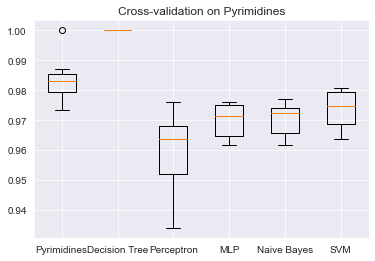

Text(0, 0.5, 'Learning time (Sec)')

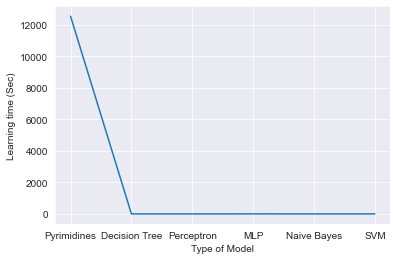

In [20]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=0)
models = []
results = []
names = []
avg_time = []

BK="Pyrimidines_B1.pl"

models.append(('ILP',"Pyrimidines", BK))
models.append(('Decision Tree', "Decision Tree", DecisionTreeClassifier()))
models.append(('Perceptron', "Perceptron", Perceptron(eta0=0.1, random_state=0, max_iter=100)))
models.append(('MLP', "MLP", MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))
models.append(('Naive Bayes', "Naive Bayes", GaussianNB()))
models.append(('SVM', "SVM", svm.SVC(gamma=0.001)))

print('****************  Pyrimidines Dataset ****************')
for name, label, model in models:
    if name=="ILP":
        print("\n")
        print("****************** Rule sets generated by Aleph for the Pyrimidines Dataset using BK:  ", label)
        start = time.time()
        cv_results, time_learn= aleph_cross_val_score_1(model, cv=10, scoring='accuracy')
        end = time.time()
        eval_time = end-start
        print(cv_results)
        avg_time.append(time_learn)
        print("Average evaluation time for ILP is :",(eval_time/10))
        print("Learning time for ILP is :",time_learn)
    else:
        start = time.time()
        kfold = StratifiedKFold(n_splits=10, random_state=1)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        eval_time = end-start # in seconds
        avg_eval_time = eval_time/10
        avg_time.append(avg_eval_time)
        print('Average evaluation time for %s is: %f ' % (name, avg_eval_time))
    results.append(cv_results)
    names.append(label)    
    print('\t\t\t\t\t\t Average Accuracy of %s is  %f with std of %f' % (name, cv_results.mean(), cv_results.std()))

print("Average time for the models :", avg_time)
pyplot.boxplot(results, labels=names)
pyplot.title('Cross-validation on Pyrimidines')
pyplot.show()

pyplot.plot(names,avg_time)
pyplot.xlabel("Type of Model")
pyplot.ylabel("Learning time (Sec)")

****************  Pyrimidines Dataset ****************
Average evaluation time for Decision Tree is: 0.010874 
						 Average Accuracy of Decision Tree is  0.992539 with std of 0.004098
Average evaluation time for Perceptron is: 0.007677 
						 Average Accuracy of Perceptron is  0.952077 with std of 0.026490
Average evaluation time for MLP is: 0.812629 
						 Average Accuracy of MLP is  0.973604 with std of 0.009045
Average evaluation time for Naive Bayes is: 0.005809 
						 Average Accuracy of Naive Bayes is  0.974177 with std of 0.008400
Average evaluation time for SVM is: 0.055052 
						 Average Accuracy of SVM is  0.974177 with std of 0.009675
Average time for the models : [0.010873627662658692, 0.00767664909362793, 0.8126287221908569, 0.005808544158935547, 0.05505228042602539]


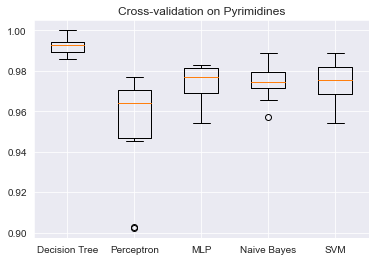

Text(0, 0.5, 'Learning time (Sec)')

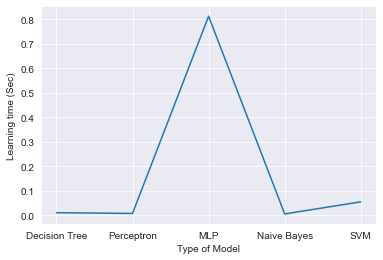

In [17]:
# For Validation Data

models = []
results = []
names = []
avg_time = []

models.append(('Decision Tree', "Decision Tree", DecisionTreeClassifier()))
models.append(('Perceptron', "Perceptron", Perceptron(eta0=0.1, random_state=0, max_iter=100)))
models.append(('MLP', "MLP", MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))
models.append(('Naive Bayes', "Naive Bayes", GaussianNB()))
models.append(('SVM', "SVM", svm.SVC(gamma=0.001)))

print('****************  Pyrimidines Dataset ****************')

for name, label, model in models:
    start = time.time()
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_validation, Y_validation, cv=kfold, scoring='accuracy')
    end = time.time()
    eval_time = end-start # in seconds
    avg_eval_time = eval_time/10
    avg_time.append(avg_eval_time)
    print('Average evaluation time for %s is: %f ' % (name, avg_eval_time))
    results.append(cv_results)
    names.append(label)    
    print('\t\t\t\t\t\t Average Accuracy of %s is  %f with std of %f' % (name, cv_results.mean(), cv_results.std()))

print("Average time for the models :", avg_time)
pyplot.boxplot(results, labels=names)
pyplot.title('Cross-validation on Pyrimidines')
pyplot.show()

pyplot.plot(names,avg_time)
pyplot.xlabel("Type of Model")
pyplot.ylabel("Learning time (Sec)")

**Discussion :**

100% accuracy was observed for the 6th fold of ILP which gave a set of structural rules for the model. A couple of sample rules from 6th fold are discussed below.
     
**Sample Rule1**: 'great(A,B) :-   struc(B,C,D,C), pi_doner(C,pi_don2)' which is a positive example of a pair of drug states that E. Coli Dihydrofolate Reductase inhibition by drug A is higher than that by B and that the chemical structure represents that drug B has an atom/group C substituted at position 3, an atom/group D substituted at position 4, and an atom/group C at position 5 with C having a pi_doner of value 2.
     
**Sample Rule2**: 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,C,E,C)' which is a positive example of a pair of drug states that E. Coli Dihydrofolate Reductase inhibition by drug A is higher than that by B and that the chemical structure represents that drug B has an atom/group C substituted at position 3, an atom/group D substituted at position 4, and an atom/group C at position 5 with D having a flex of value 7. Also drug A has an atom/group C substituted at position 3, an atom/group E substituted at position 4, and an atom/group C at position 5.
     
**Sample Rule3**: 'great(A,B) :-   struc(B,C,D,C), flex(D,flex7), struc(A,E,F,C)' which is a positive example of a pair of drug states that E. Coli Dihydrofolate Reductase inhibition by drug A is higher than that by B and that the chemical structure represents that drug B has an atom/group C substituted at position 3, an atom/group D substituted at position 4, and an atom/group C at position 5 with D having a flex of value 7. Also drug A has an atom/group E substituted at position 3, an atom/group F substituted at position 4, and an atom/group C at position 5.
     
**Other sample rules** like 'great(d10,d02)', 'great(d43,d02)' are learnt directly which are positive examples of a pair of drug and  states that E. Coli Dihydrofolate Reductase inhibition by drug d10 is higher or having a greater activity than drug d02 and that drug d43 is higher or having a greater activity than drug d02 respectively.

                                           Results obtained above in the tabular format:
     
||Learning Time|Evaluation Time| Accuracy |with std of|
|---|-------------|---------------|----------|-----------|
|**ILP**| 12541.8 | 12578.04362 | 0.983256 | 0.006903 |
||             |**Evaluation Time**| **Accuracy** |**with std of**|
|**Decision Tree**|**Train data**| 0.007229 | 1.000000 | 0.000000 |
|| **Test Data** | 0.010874 | 0.992539 | 0.004098 |
|**Perceptron**|**Train data**| 0.007283 | 0.960405 | 0.012253 |
|| **Test Data** | 0.007677 | 0.952077 | 0.026490 |
|**MLP**|**Train data**| 1.602115 | 0.969966 | 0.005484 |
|| **Test Data** | 0.812629 | 0.973604 | 0.009045 |
|**Naïve Bayes**|**Train data**| 0.005118 | 0.970158 | 0.005220 |
|| **Test Data** | 0.005809 | 0.974177 | 0.008400 |
|**SVM**|**Train data**| 0.252339 | 0.973792 | 0.005696 |
|| **Test Data** | 0.055052 | 0.974177 | 0.009675 |


**Inference :**

As evident from the table and plots above, ILP takes the longest time followed by MLP amongst other non-relational models for test data to learn the model for 10 folds cross-validation.
**Decision Tree** has the highest average accuracy both for train (100 %) and test data (99.25%) followed by **ILP** (98.33 %). The other models are very fast in comparison to ILP.

**Decision Tree** has the highest average accuracy both for train (100 %) and test data (99.25%) followed by **ILP** (98.33 %). 